# Opgave 5.1. 
Forenkl de følgende matrixudtryk: 

(a) $\left(A B^{-1}\right)^{-1} A$, 

(b) $A^{-1}\left(A^T B\right)^T$, 

(c) $(A C)^{-1}\left(A B A^{-1}\right)(A C)$, 

(d) $\left(A^{-1} B\right)^T A^T$.



In [8]:
import numpy as np
A = np.array([[1,0,2],[1,1,1],[2,3,4]])
Ainv = np.linalg.inv(A)
B = np.array([[1,2,3],[3,2,1],[2,3,1]])

[[1. 2. 3.]
 [3. 2. 1.]
 [2. 3. 1.]]


Antager at matricerne er invertible
## a)
Bruge proposition 7.6
$$
BA^{-1}A
$$
Yderligere udfra sætning 7.2
$$
BI_n
$$
Derved ved vi:
$$
B
$$

## b)
$$
A^{-1}B^TA
$$


## c)

$$
C^{-1}A^{-1}(ABA^{⁻1})(AC)
$$
vi må godt fjerne paranteser
$$
C^{-1}A^{-1}ABA^{⁻1}AC
$$
sætning 7.6
$$
C^{-1}A^{-1}ABI_nC
$$
$$
C^{-1}A^{-1}ABC
$$
sætning 7.6 og identitets matricen
$$
C^{-1}BC
$$
## d)
$$
 B^T (A^{T})^{⁻1}A^T
$$
derved udfra sætning 7.2
$$
 B^T I_n
$$
Derved
$$
B^T
$$


# Opgave 5.2. 
Betragt de følgende vektorer i $\mathbb{R}^3$ :
$$
v_0=\left[\begin{array}{c}
2 \\
1 \\
-2
\end{array}\right], \quad v_1=\left[\begin{array}{l}
1 \\
0 \\
1
\end{array}\right], \quad v_2=\left[\begin{array}{c}
1 \\
-4 \\
-1
\end{array}\right] .
$$

(a) Gør rede for at $v_0, v_1, v_2$ er en ortogonal samling.

(b) Skriv $w=(4,5,6)$, som lineær kombination $x_0 v_0+x_1 v_1+x_2 v_2$ af $v_0, v_1, v_2$, se proposition 8.17 i noterne. Brug derefter Parsevals identitet for at beregne $\|w\|_2$.

(c) Dan en ortogonal matrix $A$ hvis søjler er proportionelt med $v_0, v_1, v_2$.

(d) Hvad er forholdet mellem $A^T w$ og $x_i$ fundet i del (b)?

In [1]:
import numpy as np
# Benytter os af af Defination 8.11
#Opgave A
def ortogonalCollection(listOfVectors):
    for i in listOfVectors:
        for j in listOfVectors:
            if np.array_equal(i,j):
                continue
            prikprodukt = i.T @ j
            if prikprodukt != 0:
                return False
    return True

v0 = np.array([2,1,-2])[:,np.newaxis] 
v1 = np.array([1,0,1])[:,np.newaxis]
v2 = np.array([1,-4,-1])[:,np.newaxis]
collectionOfVectors = [v0,v1,v2]
print("A): ",ortogonalCollection(collectionOfVectors))



w = np.array([4,5,6])[:,np.newaxis]

# Opgave B
#Proposition 8.17

def parsevalIdentity(w, vectors, giveMeAll = False):
    x_values = []
    lenghts = []
    result = 0
    for v in vectors:
        lengh = np.linalg.norm(v)
        lenghts.append(lengh)
        x = (w.T @ v)/lengh**2
        x_values.append(x)
        
    for j in range(len(vectors)):
        result += (x_values[j]**2)*lenghts[j]**2
    if giveMeAll: print("\nXValues:", x_values,"\nLengths:",lenghts,"\nresult:",np.sqrt(result))
    return np.sqrt(result)

parsevalIdentity(w,collectionOfVectors)

# Opgave C

A = np.hstack([(1/3)*v0,np.sqrt(0.5)*v1,np.sqrt(1/18)*v2])

print(A)
print(abs(np.round(A.T @ A, decimals = 1)))

# Opgave D
print()
parsevalIdentity(w,collectionOfVectors,True)
ATW = A.T @ w
print()
print(ATW)
print("sammenhæng er længde af vi * xi = A.T @ W x_i indgang")

A):  True
[[ 0.66666667  0.70710678  0.23570226]
 [ 0.33333333  0.         -0.94280904]
 [-0.66666667  0.70710678 -0.23570226]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


XValues: [array([[0.11111111]]), array([[5.]]), array([[-1.22222222]])] 
Lengths: [3.0, 1.4142135623730951, 4.242640687119285] 
result: [[8.77496439]]

[[ 0.33333333]
 [ 7.07106781]
 [-5.18544973]]
sammenhæng er længde af vi * xi = A.T @ W x_i indgang


# Opgave 4. eksamen 2020 forår
Lad $A, B, C$ være matricer med $A \in \mathbb{R}^{5 \times 1000}, B \in \mathbb{R}^{1000 \times 200}$ og $C \in \mathbb{R}^{200 \times 10}$. Hvilke af de følgende matrixberegninger kræver færrest flops, og hvor mange flops bruges der for denne beregning? 

(i) $A(B C)$ eller 


(ii) $(A B) C$.

In [2]:
A = np.array([5,1000])
B = np.array([1000,200])
C = np.array([200,10])
BC = np.array([B[0],C[1]])
AB = np.array([A[0],B[1]])

def computeSizeOfMatrix(side):
    return eval(side)
    

def computeFlops(expression):
        exp = expression.split()
        op = exp[1]
        left = exp[0]
        right = "".join(exp[2:])
        match op:
            case "+":
                return computeSizeOfMatrix(left)[0] * computeSizeOfMatrix(left)[1] #matrix need to be same size
            
            case "-":
                return computeSizeOfMatrix(left)[0] * computeSizeOfMatrix(left)[1] #matrix need to be same size
                
            case "@":
                return 2*computeSizeOfMatrix(left)[0] * computeSizeOfMatrix(right)[0]* computeSizeOfMatrix(right)[1]
   

print(computeFlops("A @ BC") + computeFlops("B @ C"))
print(computeFlops("AB @ C") + computeFlops("A @ B"))

4100000
2020000


# Opgave 4. eksamen 2022

Lad $R \in \mathbb{R}^{5 \times 5}$ være en øvre triangulær matrix med alle indgange på diagonalen forskellig fra nul. Lad en vektor $c \in \mathbb{R}^5$ været givet. Systemet $R x=c$ løses via back substitution:
def back_subs( $r$, c):


Hvor mange flops bruges til at finde løsningen? Begrund dit svar.

In [3]:
def back_subs(r, c):
    n, _ = r.shape
    x = np.empty((n, 1))
    for i in reversed(range(n)):
        x[i] = (c[i] - r[[i], i+1:] @ x[i+1:]) / r[i, i]
        #       1 flop                  n-i        1 flop
    return x
# I alt 25 flops

# Opgave 5.5
Brug metoden fra 7.3 i notesæt 7 kapitel 7. til at beregne den inverse matrix

$$
A =
\begin{bmatrix}
1&2&2\\
2&1&-1\\
-1&2&1
\end{bmatrix}
$$
via rækkeoperationer. Hvor mange flops har du brugt? forsøg at reducere antallet af flops.
## Ekstra opgave
Hvor mange flops skal man forvente at bruge på at finde den inverse af en nxn-matrix via denne metode.

In [4]:
a = np.array([[1.0,2.0,2.0,1.0,0.0,0.0],
            [2.0,1.0,-1.0,0.0,1.0,0.0],
             [-1.0,2.0,1.0,0.0,0.0,1.0]])

def change(i,j):
    a[[i,j],:] = a[[j,i],:]
def factor(i,s):
    a[i,:] *= s
def add(i,j,s):
    a[i,:] += t*a[j,:]
def sub(i,j,t):
    a[i,:] -= t*a[j,:]

sub(2,0,-1)
factor(2,1/4)
sub(1,0,2)
sub(2,1,-1/3)
factor(2,1/a[2,2])
sub(1,2,-5)
factor(1,-1/3)
sub(0,2,2)
sub(0,1,2)
print("inverse\n",a[:,3:])


inverse
 [[ 0.27272727  0.18181818 -0.36363636]
 [-0.09090909  0.27272727  0.45454545]
 [ 0.45454545 -0.36363636 -0.27272727]]


# Opgave 5.6
betragt (billede fra opgavesæt)

bestem afstanden af punktet (0,1) fra hver af disse linjer, og bestemt punktet på hver linje. der ligger tættest på (0,1).

In [5]:
u = np.array([0,1])
v1 = np.array([-2,2])[:,np.newaxis]
v2 = np.array([-1,-1])[:,np.newaxis]
v3 = np.array([2,-1])[:,np.newaxis]
v4 = np.array([3,2])[:,np.newaxis]

def projektion(u,v):
    prikprodukt = u.T @ v
    vLength = np.linalg.norm(v)
    middleResult = prikprodukt/vLength**2
    result = middleResult * v
    print("\n result:\n",result)

print("v1")    
projektion(u,v1)
print("v2")
projektion(u,v2)
print("v3")
projektion(u,v3)
print("v4")
projektion(u,v4)

v1

 result:
 [[-0.5]
 [ 0.5]]
v2

 result:
 [[0.5]
 [0.5]]
v3

 result:
 [[-0.4]
 [ 0.2]]
v4

 result:
 [[0.46153846]
 [0.30769231]]


# Opgave 5.7

Lad v0, v1, v2, v3, v4 være funktionerne 1, sin(𝑥), cos(𝑥), sin(2𝑥)
og cos(2𝑥) evalueret på 200 punkter jævnt fordelt over intervallet [0, 2𝜋]. Vi
har dermed at 𝑣𝑖 er en vektorer i $ℝ^{200}$

a) Bekræft at v0, v1, v2, v3, v4 er næsten ortogonal, ved at beregne cosinus
for vinklerne mellem de forskellige vektorer, som i definition 8.5. Plot
funktionerne.

b) Lad u være vektoren i $ℝ^{200}$, som dannes ved at evaluere funktionen $𝑥^2$ på
de samme 200 punkter. Bestem projektionen af u langs samlingen v0, v1,
v2, v3, v4 og plot resultatet. Hvad er den maksimale afvigelse mellem u
og dens projektion?

c) Tilføj to ekstra vektorer v5, v6 svarende til funktionerne sin(3𝑥) og
cos(3𝑥). Find og plot den nye tilnærmelse til $𝑥^2$ via projektion af u langs
samlingen v0, . . . , v6.

d) Prøv at lave tilsvarende approksimationer til funktionen
$$
f(x)=
\begin{cases}
1, \text{for x }\leq \pi\\
0, \text{for x }> \pi
\end{cases}
$$
og plot resultaterne

e) Kan du forklar hvorfor v0, . . . , v6 er næsten ortogonale?

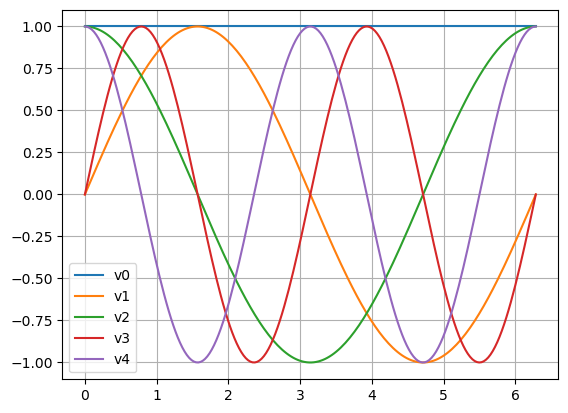

In [6]:
import matplotlib.pyplot as plt
def v0(x):
    return x/(x+0.00000000000001) #same as one

def v1(x):
    return np.sin(x)

def v2(x):
    return np.cos(x)

def v3(x):
    return np.sin(2*x)

def v4(x):
    return np.cos(2*x)

# Function to plot funcs between 0-12
# Plot the functions
def plotFuncs(funcs):
    x = np.linspace(0.00001, 2*np.pi, 200)
    fig, ax = plt.subplots() 
    for func in funcs:
        y = func(x)
        ax.plot(x, y, label=func.__name__)  
    ax.grid(True)
    ax.legend()  # Add legend to differentiate between functions
    
plotFuncs([v0,v1,v2,v3,v4])

In [7]:
#Defination 8.5
def cosAngle(u,v):
    prikprodukt = u.T @ v
    uLength = np.linalg.norm(u)
    vLength = np.linalg.norm(v)
    result = prikprodukt/(uLength*vLength)
    return result
x = np.linspace(0, 2*np.pi, 200)

print("v0 v1:",cosAngle(v0(x),v1(x)))
print("v0 v2:",cosAngle(v0(x),v2(x)))
print("v0 v3:",cosAngle(v0(x),v3(x)))
print("v0 v4:",cosAngle(v0(x),v4(x)))

print("v1 v2:",cosAngle(v1(x),v2(x)))
print("v1 v3:",cosAngle(v1(x),v3(x)))
print("v1 v4:",cosAngle(v1(x),v4(x)))

print("v2 v3:",cosAngle(v2(x),v3(x)))
print("v2 v4:",cosAngle(v2(x),v4(x)))

print("v3 v4:",cosAngle(v3(x),v4(x)))

v0 v1: -3.190099788145043e-15
v0 v2: -7.680988320835194e-15
v0 v3: -3.2826205305210324e-15
v0 v4: -6.2411955386998986e-15
v1 v2: 1.6100205879687992e-17
v1 v3: 7.538549408378139e-18
v1 v4: 8.485480461743825e-18
v2 v3: -1.967903268736206e-18
v2 v4: 0.009950248756218841
v3 v4: 3.221815731572371e-17


In [8]:
def u(x):
    return x**2


def projektion(u,v):
    prikprodukt = u.T @ v
    vLength = np.linalg.norm(v)
    middleResult = prikprodukt/vLength**2
    result = middleResult * v
    return result

# General funtion to plot the points
def plot_x_y(x, y):
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, marker='o', color='b')
    for i in range(len(x)):
        plt.scatter(x, y, color='b', zorder=5)
    
    # Create a line to across y=0
    plt.axhline(0, color='black', linestyle='-', linewidth=0.25)
    
    plt.show()

u = u(x)
v1x = v1(x)
v2x = v2(x)
v3x = v1(x)
v4x = v2(x)
projektion(u,v1x)

array([-0.00000000e+00, -3.96669139e-01, -7.92942870e-01, -1.18842618e+00,
       -1.58272484e+00, -1.97544580e+00, -2.36619760e+00, -2.75459072e+00,
       -3.14023800e+00, -3.52275503e+00, -3.90176050e+00, -4.27687661e+00,
       -4.64772943e+00, -5.01394930e+00, -5.37517115e+00, -5.73103492e+00,
       -6.08118586e+00, -6.42527495e+00, -6.76295918e+00, -7.09390195e+00,
       -7.41777336e+00, -7.73425058e+00, -8.04301812e+00, -8.34376821e+00,
       -8.63620105e+00, -8.92002514e+00, -9.19495755e+00, -9.46072423e+00,
       -9.71706026e+00, -9.96371010e+00, -1.02004279e+01, -1.04269777e+01,
       -1.06431337e+01, -1.08486803e+01, -1.10434128e+01, -1.12271369e+01,
       -1.13996696e+01, -1.15608388e+01, -1.17104840e+01, -1.18484558e+01,
       -1.19746169e+01, -1.20888415e+01, -1.21910156e+01, -1.22810374e+01,
       -1.23588172e+01, -1.24242775e+01, -1.24773530e+01, -1.25179908e+01,
       -1.25461504e+01, -1.25618037e+01, -1.25649352e+01, -1.25555416e+01,
       -1.25336324e+01, -